In [1]:
from sklearn.datasets import fetch_openml
esl = fetch_openml(name='ESL', version=1)
print(esl.DESCR) # выводим общее описание датасета
print(esl.data.head()) # выводим первые строки данных


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

1. Title: Employee Selection (Ordinal ESL)

2. Source Informaion:
Donor: Arie Ben David
MIS, Dept. of Technology Management
Holon Academic Inst. of Technology
52 Golomb St.
Holon 58102
Israel
abendav@hait.ac.il
Owner: Yoav Ganzah
Business Administration School
Tel Aviv Univerity
Ramat Aviv 69978
Israel

3. Past Usage:

4. Relevant Information
The ESL data set contains 488 profiles of applicants for certain industrial
jobs.  Expert psychologists of a recruiting company, based upon psychometric
test results and interviews with the candidates, determined the values of the
input attributes. The output is the an overall score corresponding to the
degree of fitness of the candidate to this type of job.


5. Number of Instances: 488

6. Number of Attributes: 4 input, 1 output.

7. Attribute Information: All input and output values are ORDINAL.

8. Missing Attribute Values: None.

9. Class Distribution:

Downloaded from o

In [2]:
# Количество строк и столбцов:
print(esl.data.shape) 


(488, 4)


In [3]:
# Типы данных:
print(esl.data.dtypes)


in1    float64
in2    float64
in3    float64
in4    float64
dtype: object


In [4]:
# Количество значений в каждом столбце:
print(esl.data.count())


in1    488
in2    488
in3    488
in4    488
dtype: int64


In [5]:
# Основная статистическая информация об атрибутах
print(esl.data.describe())


              in1         in2         in3         in4
count  488.000000  488.000000  488.000000  488.000000
mean     5.506148    5.084016    5.344262    5.610656
std      1.525944    1.551018    1.135722    0.937497
min      0.000000    0.000000    2.000000    2.000000
25%      4.750000    4.000000    5.000000    5.000000
50%      6.000000    5.000000    5.000000    6.000000
75%      6.000000    6.000000    6.000000    6.000000
max      9.000000    9.000000    8.000000    8.000000


Описание датасета:
Датасет ESL содержит информацию о 488 профилях заявителей на определенные отрасли рабочих мест. Входные атрибуты были определены экспертами-психологами рекрутинговой компании, основанными на результаты тестов и собеседования с кандидатами. Целевая переменная - общий балл, соответствующий степени пригодности кандидата к данному виду работы. Задача моделирования - предсказать значение целевой переменной на основе входных атрибутов.

In [6]:
# Удаляем нечисловые колонки
esl_num = esl.data.select_dtypes(include='number')


In [7]:
# Заполняем пропущенные значения нулями
esl_num = esl_num.fillna(0)


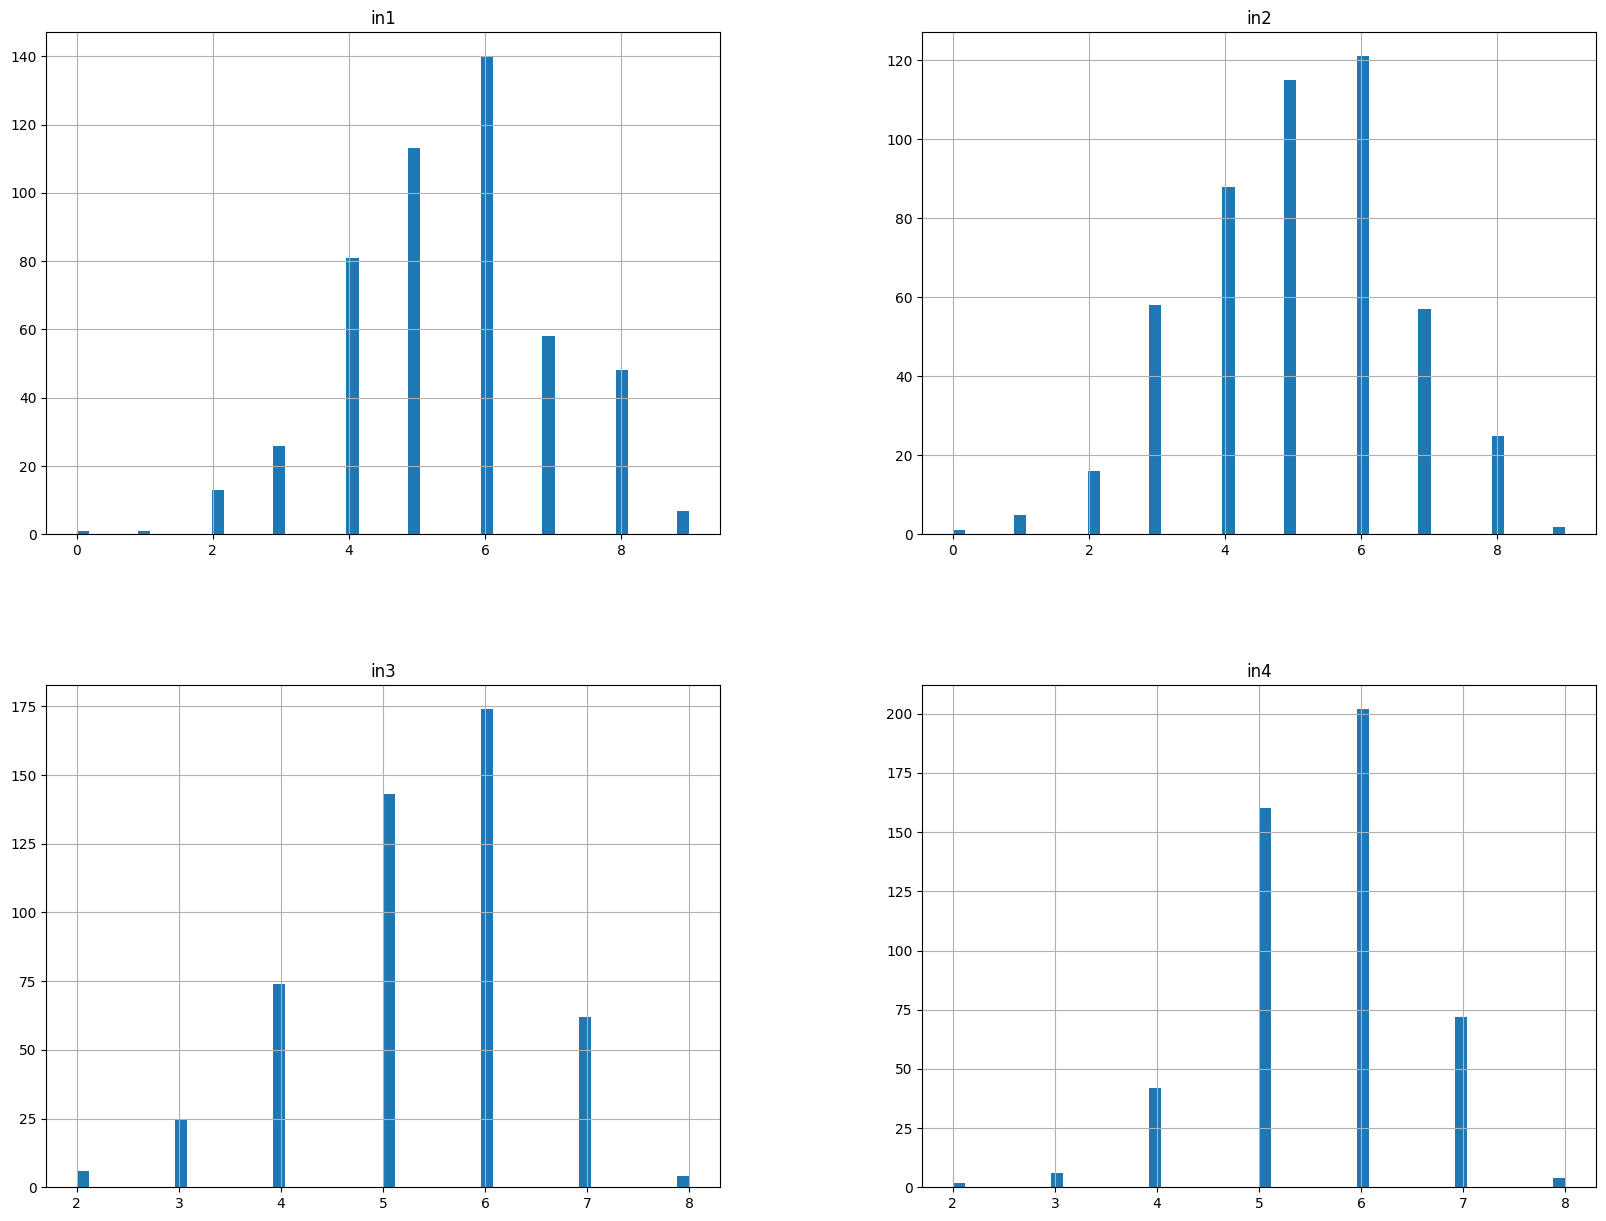

In [8]:
# Строим гистограммы распределения по каждому признаку
import matplotlib.pyplot as plt
esl_num.hist(bins=50, figsize=(20,15))
plt.show()


In [27]:
# Строим модель машинного обучения:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(esl_num.drop('in1', axis=1), esl_num['in1'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(esl_num.drop('in2', axis=1), esl_num['in2'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(esl_num.drop('in3', axis=1), esl_num['in3'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(esl_num.drop('in4', axis=1), esl_num['in4'], test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [28]:
# Измеряем эффективность модели:
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))


R2 score: 0.27562086239857986


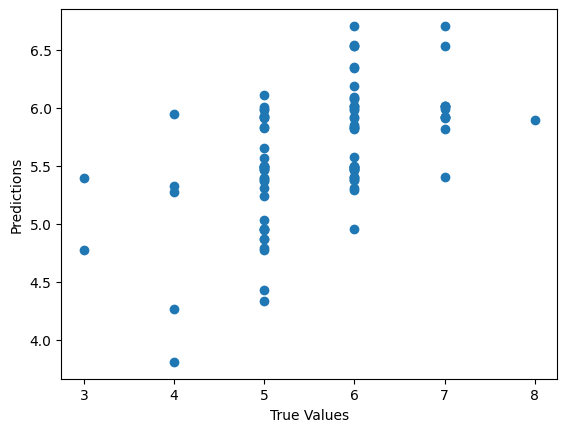

In [29]:
# Визуализируем результаты моделирования
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


KeyError: ignored

In [32]:
# ДОполнительное
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(esl.drop('class', axis=1), esl['class'], test_size=0.2, random_state=42)


AttributeError: ignored

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.46938775510204084
